In [1]:
import numpy as np
import imageio as io
import scipy
from scipy import stats
import matplotlib.pyplot as plt

from scipy import ndimage

In [ ]:
def 

In [ ]:
r_shift = np.right_shift(m_normalized, 8-B)

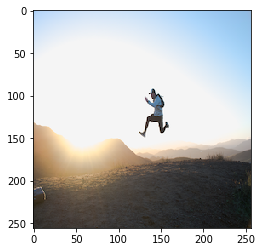

In [5]:
img = io.imread('ImagesForDebugging/wheres_jumpingguy.png')
plt.imshow(img)

In [8]:
teste = np.floor(0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2])

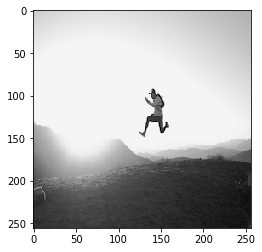

In [10]:
plt.imshow(teste, cmap =  'gray')

In [13]:
teste = teste.astype(np.uint8)
np.right_shift(teste, 3)

Array([[24, 24, 24, ..., 22, 22, 22],
       [24, 24, 25, ..., 22, 22, 22],
       [24, 24, 25, ..., 22, 22, 22],
       ...,
       [ 5,  5,  5, ...,  5,  5,  7],
       [ 5,  5,  5, ...,  4,  5,  6],
       [ 5,  5,  5, ...,  4,  4,  6]], dtype=uint8)

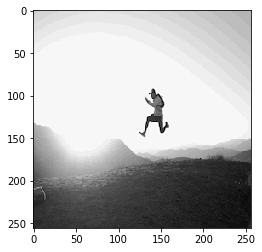

In [15]:
plt.imshow(np.right_shift(teste, 3), cmap =  'gray')

In [18]:
teste2 = np.right_shift(teste, 3)

In [29]:
teste3 = np.histogram(teste2, bins = 31)

In [26]:
np.max(teste2)

31

In [34]:
 np.linalg.norm(teste3[0])

26159.338217928984

In [33]:
teste3[0]

(31,)

In [37]:
np.histogram(teste2, bins = 31, density = True)[0]

array([0.00083923, 0.00126648, 0.01219177, 0.02548218, 0.03408813,
       0.03585815, 0.04167175, 0.03987122, 0.02989197, 0.0181427 ,
       0.01403809, 0.01113892, 0.00762939, 0.00695801, 0.00712585,
       0.00640869, 0.0072937 , 0.00733948, 0.00772095, 0.00854492,
       0.01286316, 0.01229858, 0.01283264, 0.01870728, 0.02171326,
       0.02513123, 0.03138733, 0.04412842, 0.05786133, 0.06822205,
       0.37135315])

In [67]:
def intensity_co_ocurrence(img,d_x,d_y, levels):
    srcdata = img.copy()
    ret=np.zeros((levels, levels))
    (height,width) = srcdata.shape


    for j in range(height-d_y):
        for i in range(width-d_x):
            rows = srcdata[j][i]
            cols = srcdata[j + d_y][i+d_x]
            ret[rows][cols]+=1.0
    
    print(ret.sum())
    ret =  ret/(ret.sum())
    
    return ret


In [139]:
def feature_computer(p, levels, eps = 0.001):
    con = 0.0
    ent = 0.0
    energy = 0.0
    homo = 0.0
    corr = 0
    
    result = []
    
    for i in range(levels):
        for j in range(levels):
            con += ((i-j)*(i-j)*p[i][j])
            ent += p[i][j]*np.log(p[i][j] + eps)
            energy += np.power((i-j),2)
            homo += (p[i][j]/(1+np.absolute(i-j)))
    corr = calc_corr(p, levels)
    
    con = 1/(np.power(levels, 2)*con)
    result.append(energy)
    result.append(-ent)
    result.append(con)
    result.append(corr)
    result.append(homo)
    
    result = np.array(result)
    return (result/np.linalg.norm(result))

In [140]:
simple_test = np.array([[1,1,2,2,2], [1,1,1,2,2], [1,1,0,2,2], [0,0,2,0,2], [1,2,2,2,2]])

In [141]:
teste4 = getGlcm(simple_test, 1, 1,3)

16.0


In [142]:
feature_computer(teste4, 3)

array([ 9.88426703e-01,  1.38247599e-01,  9.15209910e-03, -3.68602015e-04,
        6.17766690e-02])

In [ ]:
np.mean(simple)

In [86]:
np.mean(np.array([[1,1,2], [1,2,2]]), 1)

array([1.33333333, 1.66666667])

In [107]:
mean_test = np.array([[1,1,2], [1,2,2], [1,2,2]])

In [125]:
def calc_mean_x(matrix,  size):
    ui = 0
    temp = 0
    for i in range(size):
        temp += i

        for j in range(size):
            ui += temp*mean_test[i][j]
    return ui

In [126]:
def calc_mean_y(matrix,  size):
    uj = 0
    temp = 0
    for j in range(size):
        temp += j
        for i in range(size):
            uj += temp*mean_test[i][j]
    return uj

In [122]:
ui = 0
temp = 0
for i in range(3):
    temp += i
    print(i)
    for j in range(3):
        ui += temp*mean_test[j][i]
ui

0
1
2


23

In [130]:
def calc_std_x(matrix, ui, size):
    aux = 0
    std_x = 0
    for i in range(size):
        aux += np.power((i-ui), 2)
        for j in range(size):
            std_x += aux*matrix[i][j]
            
    return std_x

In [121]:
calc_std_x(mean_test, 20, 3)

10830

In [131]:
def calc_std_y(matrix, uj, size):
    aux = 0
    std_y = 0
    for j in range(size):
        aux += np.power((j-uj), 2)
        for i in range(size):
            std_y += aux*matrix[i][j]
            
    return std_y

In [123]:
calc_std_x(mean_test, 23, 3)

14451

In [132]:
def calc_corr(matrix, size):
    ui = calc_mean_x(matrix, size)
    uj = calc_mean_y(matrix, size)
    
    std_x = calc_std_x(matrix, ui, size)
    std_y = calc_std_y(matrix, uj, size)
    
    if (std_x or std_y) == 0:
        return 0
    else:
        corr = 0
        for i in range(size):
            for j in range(size):
                corr += (((i*j)*matrix[i][j]) - (ui*uj))/(std_x*std_y)
                
        return corr

In [133]:
calc_corr(mean_test, 3)

-2.4753474133880623e-05